In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# 1. Data Loading and Exploration:
Utilize Pandas to load the dataset and explore its initial structure.
Summarize features, target variable, and their respective data types.
Conduct basic descriptive statistics for an overview of the dataset.

In [2]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [6]:
df.isnull().sum()

,0
battery_power,0
blue,0
clock_speed,0
dual_sim,0
fc,0
four_g,0
int_memory,0
m_dep,0
mobile_wt,0
n_cores,0


In [13]:
df.duplicated().sum()

0

In [16]:
#Summarize features, target variable, and their respective data types.
features = df.drop(columns=['price_range'])
target = df['price_range']



In [17]:
target.value_counts()

,count
price_range,
1,500
2,500
3,500
0,500


In [ ]:
#Conduct basic descriptive statistics for an overview of the dataset.


In [14]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [22]:
#Count binary data

print(df['blue'].value_counts())
print(df['dual_sim'].value_counts())
print(df['four_g'].value_counts())
print(df['three_g'].value_counts())
print(df['touch_screen'].value_counts())
print(df['wifi'].value_counts())

blue
0    1010
1     990
Name: count, dtype: int64
dual_sim
1    1019
0     981
Name: count, dtype: int64
four_g
1    1043
0     957
Name: count, dtype: int64
three_g
1    1523
0     477
Name: count, dtype: int64
touch_screen
1    1006
0     994
Name: count, dtype: int64
wifi
1    1014
0     986
Name: count, dtype: int64


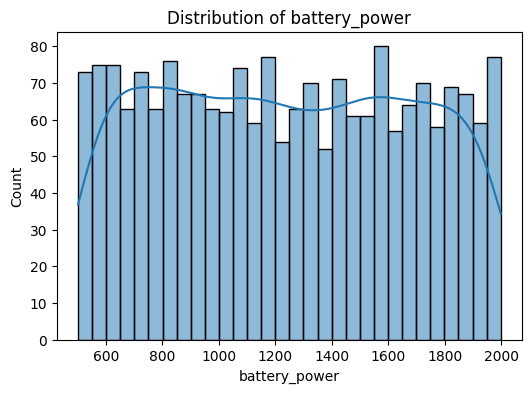

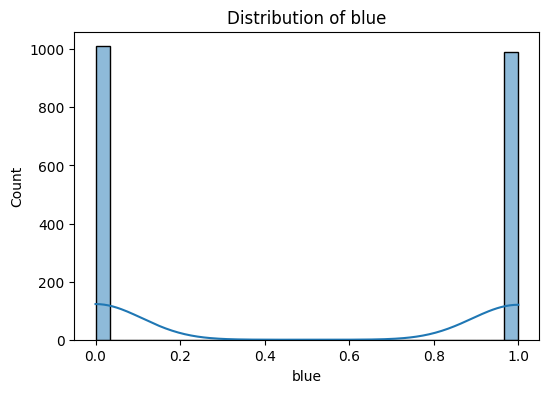

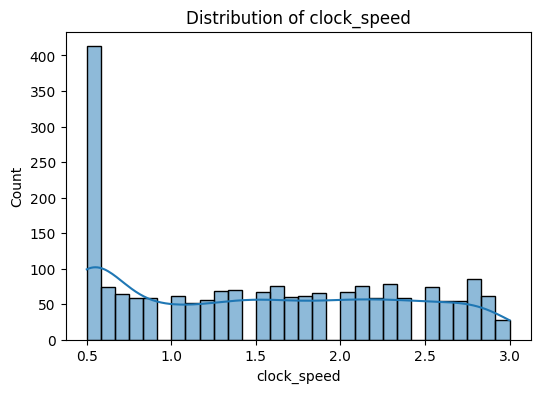

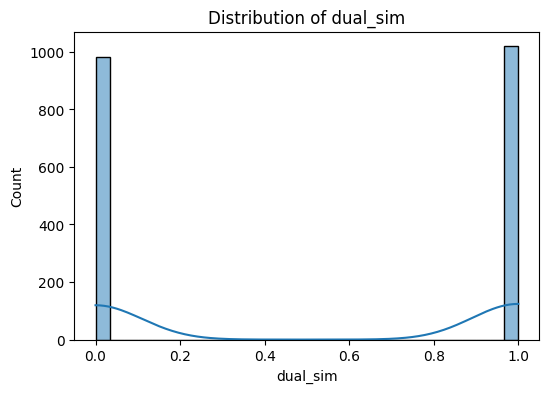

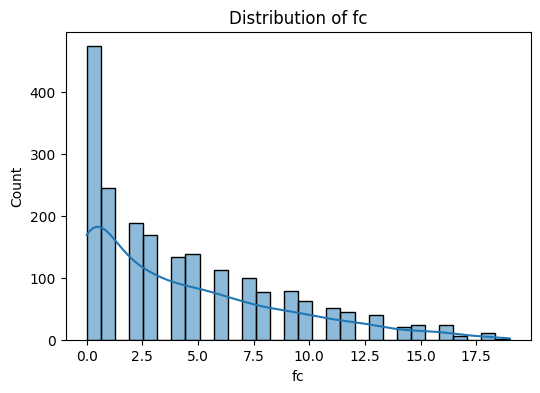

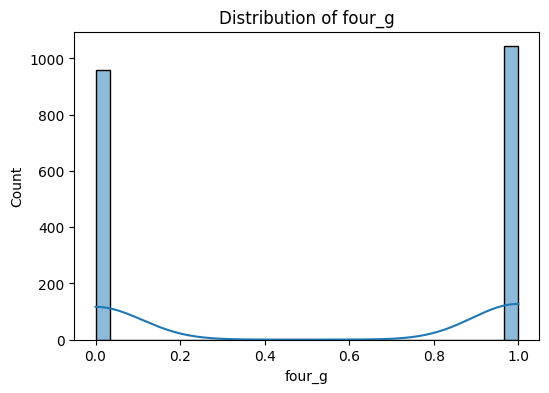

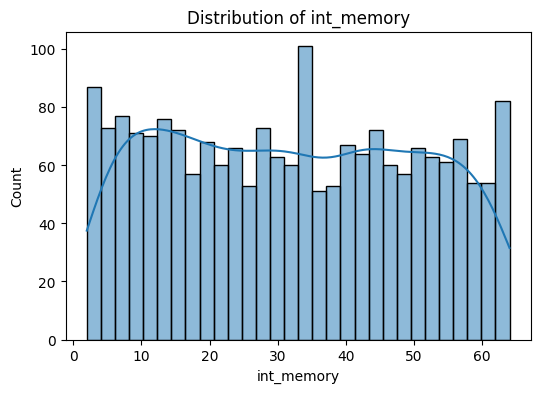

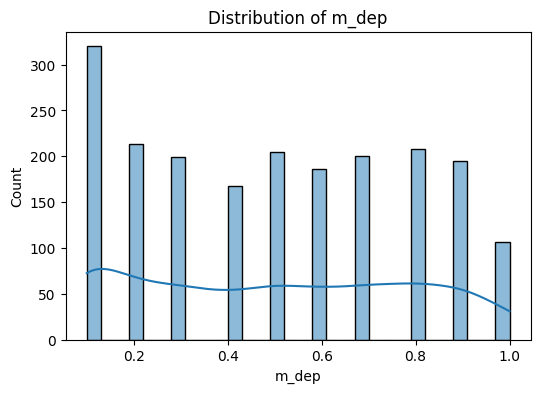

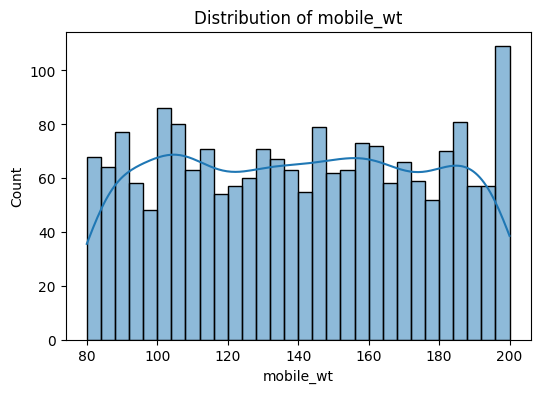

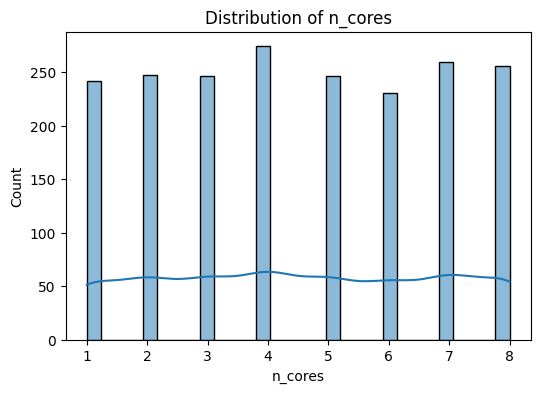

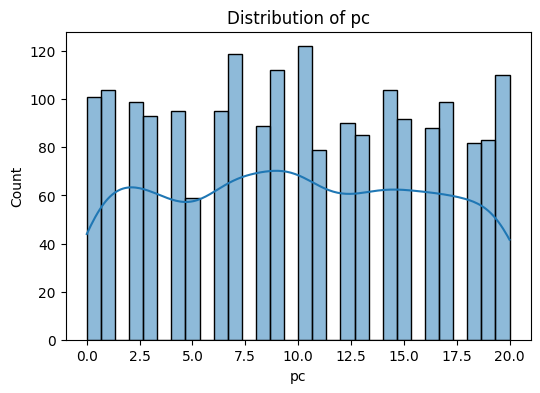

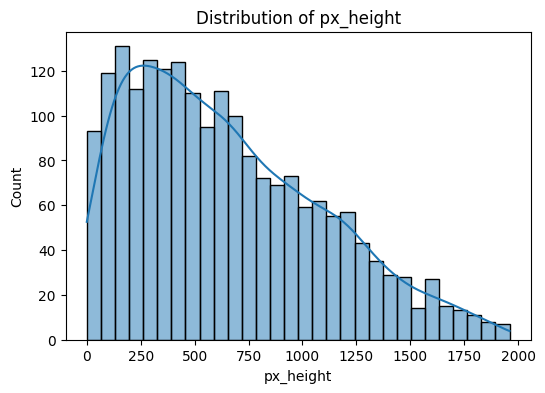

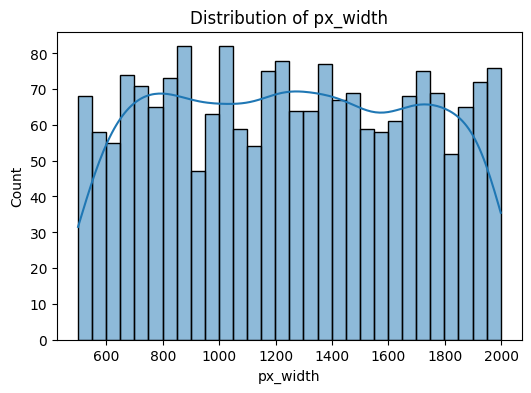

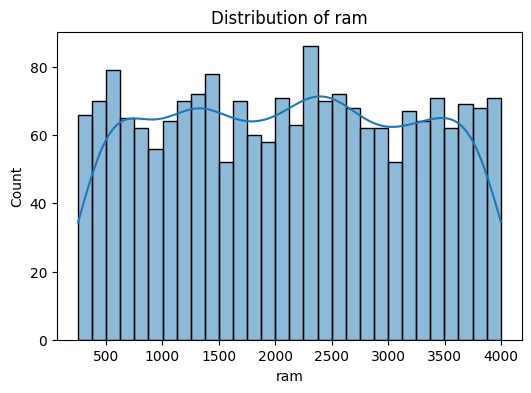

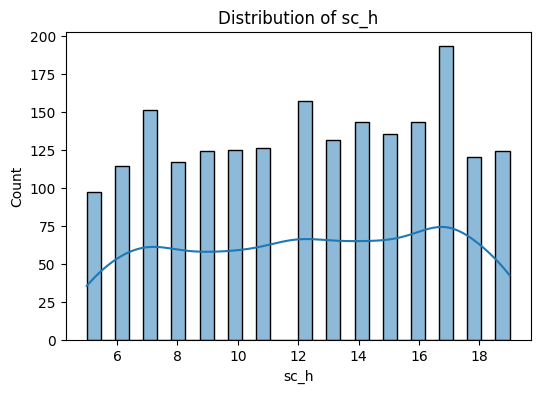

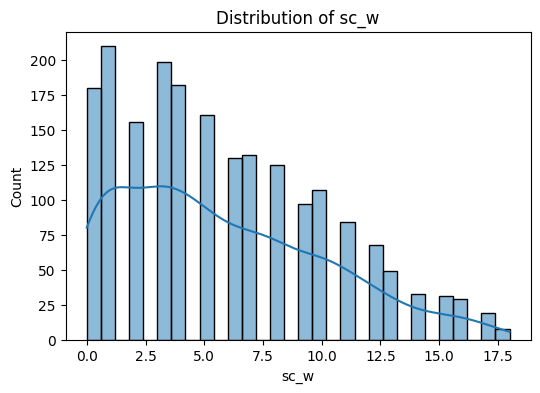

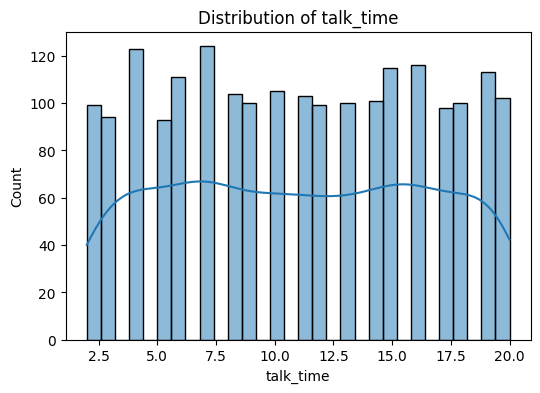

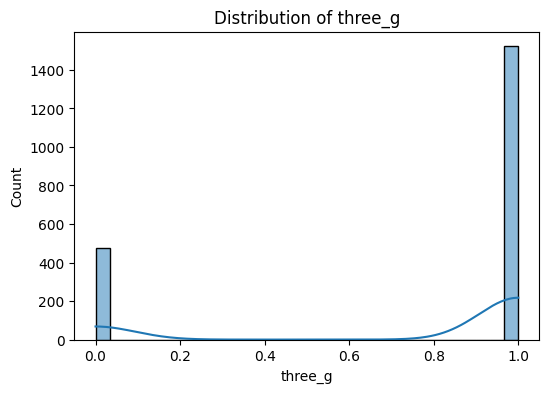

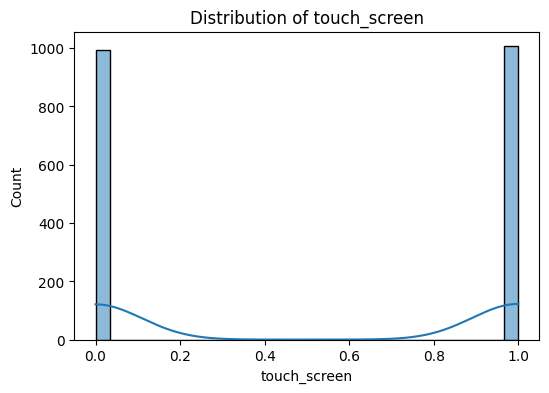

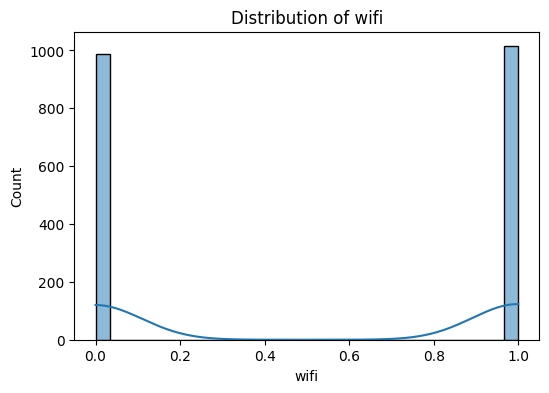

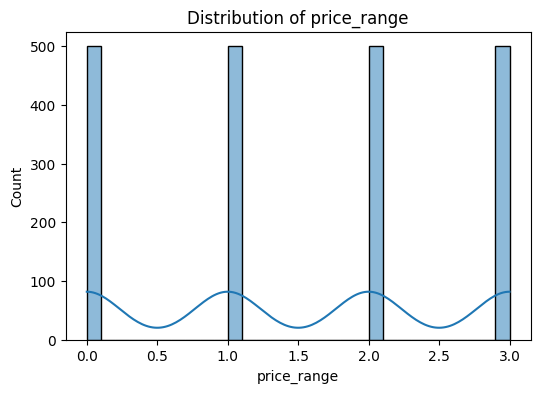

In [31]:
for column in df.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f"Distribution of {column}")
    plt.show()


# 2. Data Cleaning and Preprocessing:

Address missing or null values. (already checked, there is not)

Transform categorical data into numerical format using suitable methods. (all data is in numeric format)

# 3. Statistical Analysis with NumPy and SciPy:

Execute detailed statistical analysis on each feature, including:
Calculation of central tendency measures (mean, median, mode).
Analysis of variability (range, variance, standard deviation).
Evaluation of distribution shapes through skewness and kurtosis.
Perform hypothesis testing for statistical significance between groups (e.g., different price ranges).
Investigate feature-target correlations using SciPy.
Apply advanced SciPy statistical functions for deeper insights.

In [34]:
# Central Tendency Measures
mean = df.mean()
median = df.median()
mode = df.mode().iloc[0]

print("Mean:")
print(mean)
print("\nMedian:")
print(median)
print("\nMode:")
print(mode)

Mean:
battery_power    1238.51850
blue                0.49500
clock_speed         1.52225
dual_sim            0.50950
fc                  4.30950
four_g              0.52150
int_memory         32.04650
m_dep               0.50175
mobile_wt         140.24900
n_cores             4.52050
pc                  9.91650
px_height         645.10800
px_width         1251.51550
ram              2124.21300
sc_h               12.30650
sc_w                5.76700
talk_time          11.01100
three_g             0.76150
touch_screen        0.50300
wifi                0.50700
price_range         1.50000
dtype: float64

Median:
battery_power    1226.0
blue                0.0
clock_speed         1.5
dual_sim            1.0
fc                  3.0
four_g              1.0
int_memory         32.0
m_dep               0.5
mobile_wt         141.0
n_cores             4.0
pc                 10.0
px_height         564.0
px_width         1247.0
ram              2146.5
sc_h               12.0
sc_w                5.

In [36]:
#Analysis of Variability
range = df.max() - df.min()
variance = df.var()
std_dev = df.std()

print("Range:")
print(range)
print("\nVariance:")
print(variance)
print("\nStandard Deviation:")
print(std_dev)

Range:
battery_power    1497.0
blue                1.0
clock_speed         2.5
dual_sim            1.0
fc                 19.0
four_g              1.0
int_memory         62.0
m_dep               0.9
mobile_wt         120.0
n_cores             7.0
pc                 20.0
px_height        1960.0
px_width         1498.0
ram              3742.0
sc_h               14.0
sc_w               18.0
talk_time          18.0
three_g             1.0
touch_screen        1.0
wifi                1.0
price_range         3.0
dtype: float64

Variance:
battery_power    1.930884e+05
blue             2.501001e-01
clock_speed      6.658629e-01
dual_sim         2.500348e-01
fc               1.884813e+01
four_g           2.496626e-01
int_memory       3.292670e+02
m_dep            8.318353e-02
mobile_wt        1.253136e+03
n_cores          5.234197e+00
pc               3.677592e+01
px_height        1.969414e+05
px_width         1.867964e+05
ram              1.176644e+06
sc_h             1.775143e+01
sc_w         

In [37]:
#Distribution Shapes
skewness = df.skew()
kurtosis = df.kurtosis()

print("Skewness:")
print(skewness)
print("\nKurtosis:")
print(kurtosis)

Skewness:
battery_power    0.031898
blue             0.020016
clock_speed      0.178084
dual_sim        -0.038035
fc               1.019811
four_g          -0.086144
int_memory       0.057889
m_dep            0.089082
mobile_wt        0.006558
n_cores          0.003628
pc               0.017306
px_height        0.666271
px_width         0.014787
ram              0.006628
sc_h            -0.098884
sc_w             0.633787
talk_time        0.009512
three_g         -1.228142
touch_screen    -0.012009
wifi            -0.028024
price_range      0.000000
dtype: float64

Kurtosis:
battery_power   -1.224144
blue            -2.001602
clock_speed     -1.323417
dual_sim        -2.000555
fc               0.277076
four_g          -1.994575
int_memory      -1.216074
m_dep           -1.274349
mobile_wt       -1.210376
n_cores         -1.229750
pc              -1.171499
px_height       -0.315865
px_width        -1.186005
ram             -1.191913
sc_h            -1.190791
sc_w            -0.389523
ta

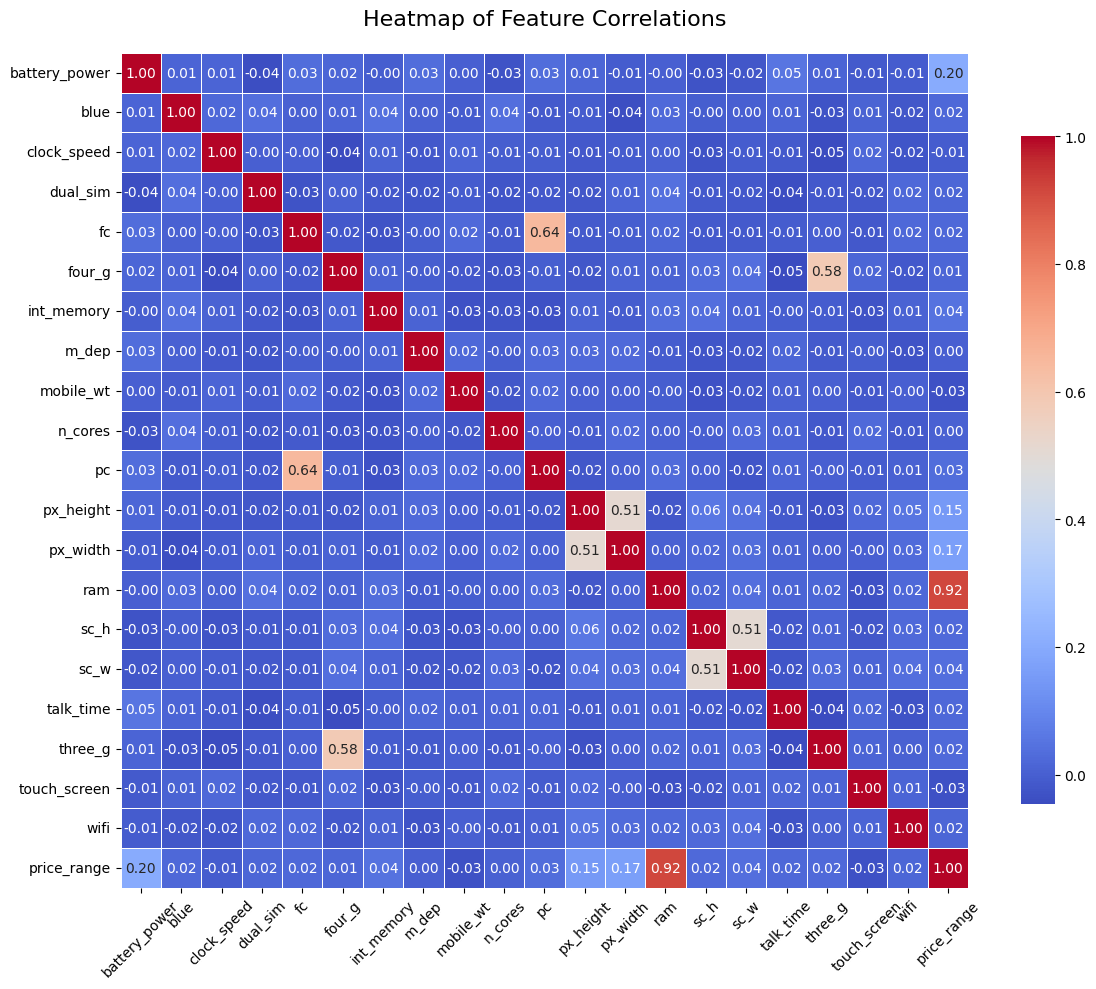

In [39]:
# Heatmap of correlations
corr_matrix = df.corr()


plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix,
            annot=True,
            fmt=".2f",
            cmap="coolwarm",
            annot_kws={"size": 10},
            linewidths=0.5,
            cbar_kws={'shrink': 0.8})

# settings for axises
plt.title("Heatmap of Feature Correlations", fontsize=16, pad=20)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10, rotation=0)
plt.tight_layout()


plt.show()




1.   RAM has a strong correlation with the target variable price range. This means that the increase in RAM is directly related to the increase in the price range of mobile devices.
2.   px_width and px_height moderate correlation with price_range, this suggests that screen resolution is an important, but not the main factor affecting the cost of devices.
3. pc (Primary Camera) and fc (Front Camera).
This means that the resolution of the main camera has a greater impact on the cost than the resolution of the front camera.
4. Battery Power the dependence is rather weak, which may mean that battery power is a less significant factor for price formation
5. three_g, blue, dual_sim, touch_screen, wifi, have a very weak correlation with the target variable.





In [44]:
#Hypothesis Testing
# RAM (Random Access Memory) and price range
# H0 there is no difference between ram in differet price range groups
# H1 there is difference between at least between two group

# ANOVA test
groups = df.groupby('price_range')['ram'].apply(list)
f_statistic, p_value = f_oneway(*groups)

print("F-statistic:", f_statistic)
print("P-value:", p_value)

if p_value < 0.05:
    print("There is a significant difference between the price ranges.")
    print("Reject the null hypothesis.")
else:
    print("There is no significant difference between the price ranges.")



F-statistic: 3520.110823895761
P-value: 0.0
There is a significant difference between the price ranges.
Reject the null hypothesis.


In [11]:
#Shapiro-Wilk Test
#if the distribution normal or not
from scipy.stats import shapiro

#H0 - the distribution is propably Gaussian
#H1 - the distribution of data probably not Gaussian

for group in df.groupby('price_range'):
    stat, p = shapiro(group[1]['ram'])
    print('Group:', group[0])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:
        print('Probably Gaussian (normal distribution)')
    else:
        print('Probably not Gaussian (not normal distribution)')




Group: 0
Statistics=0.953, p=0.000
Probably not Gaussian (not normal distribution)
Group: 1
Statistics=0.994, p=0.043
Probably not Gaussian (not normal distribution)
Group: 2
Statistics=0.997, p=0.479
Probably Gaussian (normal distribution)
Group: 3
Statistics=0.941, p=0.000
Probably not Gaussian (not normal distribution)


In [28]:
# It seems that not all data groups have exactly a normal distribution, so it is not very correct to conduct
# an ANOVA test on them. (he's sensitive) As I understand it, the Kruskal-Wallis test is better suited for this.

from scipy.stats import kruskal

groups = df.groupby('price_range')['ram'].apply(list)
stat, p = kruskal(*groups)

print('Statistics=%.3f, p=%.3f' % (stat, p))

if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

#Kruskal-Wallis coincides with the result of ANOVA,
#which means that there are indeed significant differences in RAM in at least two groups

Statistics=1681.496, p=0.000
Probably different distributions


In [43]:

#Correlation between the features and the target variable
from scipy.stats import pearsonr
from scipy.stats import spearmanr

#Correlation between ram and price_range
correlation, p_value = spearmanr(df['ram'], df['price_range'])
print("Spearman's correlation coefficient RAM and price range:", correlation)
print("P-value:", p_value)

if p_value < 0.05:
    print("There is a significant correlation between RAM and price range.")
else:
    print("There is no significant correlation between RAM and price range.")


#Correlation between px_width and px_height with price_range
correlation, p_value = pearsonr(df['px_width'], df['px_height'])
print("Pearson's correlation coefficient Pixel Width and Pixel Height:", correlation)
print("P-value:", p_value)

if p_value < 0.05:
    print("There is a significant correlation between Pixel Width and Pixel Height.")
else:
    print("There is no significant correlation between Pixel Width and Pixel Height.")


correlation, p_value = pearsonr(df['px_width'], df['price_range'])
print("Pearson's correlation coefficient Pixel Width and price range:", correlation)
print("P-value:", p_value)


if p_value < 0.05:
    print("There is a significant correlation between Pixel Width and Pixel Height.")
else:
    print("There is no significant correlation between Pixel Width and Pixel Height.")


correlation, p_value = pearsonr(df['px_height'], df['price_range'])
print("Pearson's correlation coefficient Pixel Height and price range:", correlation)
print("P-value:", p_value)

if p_value < 0.05:
    print("There is a significant correlation between Pixel Height and price range.")
else:
    print("There is no significant correlation between Pixel Height and price range.")


Spearman's correlation coefficient RAM and price range: 0.9170797841496084
P-value: 0.0
There is a significant correlation between RAM and price range.
Pearson's correlation coefficient Pixel Width and Pixel Height: 0.5106644191393137
P-value: 2.8109953814110875e-133
There is a significant correlation between Pixel Width and Pixel Height.
Pearson's correlation coefficient Pixel Width and price range: 0.16581750172625506
P-value: 8.47896879829254e-14
There is a significant correlation between Pixel Width and Pixel Height.
Pearson's correlation coefficient Pixel Height and price range: 0.14885755500042172
P-value: 2.2278061308132366e-11
There is a significant correlation between Pixel Height and price range.


Statistically, we have proved that there is indeed a correlation between the features and the target variable

In [45]:
#other corr
#Correlation between batery power and talk time
correlation, p_value = pearsonr(df['battery_power'], df['talk_time'])
print("Pearson's correlation coefficient Battery Power and Talk Time:", correlation)
print("P-value:", p_value)

if p_value < 0.05:
    print("There is a significant correlation between Battery Power and Talk Time.")
else:
    print("There is no significant correlation between Battery Power and Talk Time.")




Pearson's correlation coefficient Battery Power and Talk Time: 0.05251035465759493
P-value: 0.018849878282726867
There is a significant correlation between Battery Power and Talk Time.


which of course is logical)))

Key Findings from the Data Analysis and Correlation Matrix:

- RAM is the strongest indicator of phone price.
- Screen resolution also matters, but not as much as RAM.
- The primary camera affects the price a little, while the front camera does not.
- Battery power has a small impact on price.